In [1]:
import pandas as pd #load module for data manipulation
import numpy as np

In [2]:
'''
input file is p-values listed by gene (row) across samples (columns) with row and column headers
p-values will be z-scored across all samples in a row
all rows must have uniform length
'''

pval_df = pd.read_csv('pvals.txt', low_memory=False, delimiter = "\t")
#print(pval_df.head(5))

In [3]:
from scipy import stats #load module for Stouffer's z-score method combined p-value calculation

In [4]:
#performs Stouffer's z-score method combined p-value calculation on pval_df
item_array = []
results_zscore_array = []
results_pvalue_array = []
results_total_array = []

for row_num, row_data in pval_df.iterrows():
    temp_y = list(pval_df.iloc[row_num])
    item = temp_y[0]
    temp_y.pop(0)
    combo_Zscore, combo_pvalue = stats.combine_pvalues(pvalues = temp_y, method = 'stouffer')
    combo_Zscore = (round(combo_Zscore, 1))
    combo_pvalue = format(combo_pvalue, '.2e')
    
    print(str(item) + ': Stouffers z-score is ' + str(combo_Zscore))
    print(str(item) + ': Combined p-value ' + str(combo_pvalue))
    print()
    
    item_array.append(item)
    results_zscore_array.append(combo_Zscore)
    results_pvalue_array.append(combo_pvalue)
    total = str(combo_Zscore) + ' (' + str(combo_pvalue) + ')'
    results_total_array.append(total)
    
#combine and save data to file
df_to_save = pd.DataFrame(np.column_stack([results_zscore_array, results_pvalue_array]),
                          columns=['Stouffers z-score', 'Combined p-value'],
                          index=item_array)
df_to_save.to_csv("results.txt", sep ='\t', index=True)

SEMA3C: Stouffers z-score is 11.5
SEMA3C: Combined p-value 4.09e-31

PARM1: Stouffers z-score is 9.6
PARM1: Combined p-value 3.09e-22

KCNK2: Stouffers z-score is 12.6
KCNK2: Combined p-value 8.22e-37

ITPRIPL1: Stouffers z-score is 12.4
ITPRIPL1: Combined p-value 1.45e-35

CTPS2: Stouffers z-score is 12.3
CTPS2: Combined p-value 4.57e-35

EBP: Stouffers z-score is 12.2
EBP: Combined p-value 1.15e-34

LIN9: Stouffers z-score is 12.2
LIN9: Combined p-value 2.52e-34

GPX7: Stouffers z-score is 12.3
GPX7: Combined p-value 8.16e-35

PHF19: Stouffers z-score is 11.8
PHF19: Combined p-value 3.16e-32

ASCL1: Stouffers z-score is 11.8
ASCL1: Combined p-value 3.31e-32



In [5]:
'''
input file is T-scores listed by gene (row) across samples (columns) with row and column headers
all rows must have uniform length
'''

Tscore_df = pd.read_csv('Tscoredata.txt', low_memory=False, delimiter = "\t", index_col=0)
print(Tscore_df.head(5))

          GSE94259 pano  GSE153441 pano  GSE123278 pano  GSE117446 pano  \
Genes                                                                     
SEMA3C         7.821243       11.680711        2.850914        2.556639   
PARM1          7.604738       12.074816        2.658587        3.139210   
KCNK2         -7.009334      -11.449176      -12.425876       -1.620712   
ITPRIPL1      -5.267419      -11.195100       -3.583891       -5.745179   
CTPS2         -6.544339      -12.151059       -5.757621       -3.096055   

          GSE94259 JQ1  GSE94259 JQ1+pano  GSE94259 THZ1  GSE94259 THZ1+pano  \
Genes                                                                          
SEMA3C       12.024380           6.872080      -3.607282           -3.378420   
PARM1         1.372387           7.376059      -1.839483           -1.642962   
KCNK2        -7.695025          -8.020082      -8.252723           -8.221449   
ITPRIPL1     -9.520486          -9.883276      -9.863607          -10.3651

In [6]:
#convert pval_df from pval floats to * string significance markers for p<0.05 for heatmap annotation
pval_df.drop(columns=pval_df.columns[0], axis=1, inplace=True)
studies = list(pval_df)

temp_value = ''
for col in pval_df:
    pval_df.loc[pval_df[col] < 0.05, col] = "o"
    pval_df.loc[pval_df[col] != "o", col] = " "

In [7]:
import math

#set color bar range
maxValues = Tscore_df.max()
highest_Tscore = max(maxValues)
minValues = Tscore_df.min()
lowest_Tscore = min(minValues)

if highest_Tscore > abs(lowest_Tscore):
    cmap_set_point = highest_Tscore
else:
    cmap_set_point = abs(lowest_Tscore)
cmap_set_point = math.ceil(cmap_set_point)

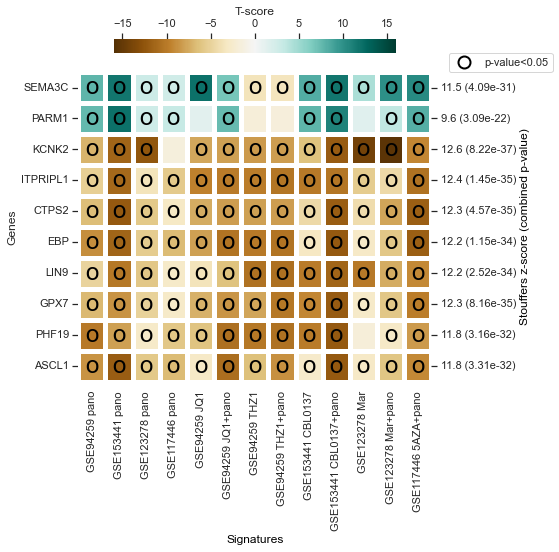

In [8]:
## load modules for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'}) #sets up white background for heat map

fig, ax = plt.subplots(figsize = (8, 8))
ax.set_xlabel('Signatures', color = 'black')

ax = sns.heatmap(Tscore_df, cbar=False)
ax.set_yticklabels(labels=item_array, rotation=0)

    
ax2 = ax.twinx()

ax2 = sns.heatmap(Tscore_df, linewidth = 5,
                 cmap = 'BrBG', fmt = 's', center = 0, cbar_kws = {'shrink': 0.8, 'label': 'T-score', 'location':"top"},
                 vmin = (-1*cmap_set_point), vmax = cmap_set_point, 
                 annot=pval_df,
                 annot_kws={'fontsize': 24, 'fontstyle': 'normal', 'color':'black',
                       'rotation': 'horizontal', "va": 'center'})

ax2.set_yticklabels(labels=results_total_array, rotation=0)
ax.set_xlabel('Signatures', color = 'black')
ax2.set_ylabel('Stouffers z-score (combined p-value)', color = 'black')

legend_star = mlines.Line2D([], [], color='black', linestyle="None", markeredgewidth=2, fillstyle="none", marker='o', label='p-value<0.05')
plt.legend(handles=[legend_star], markerscale=2, bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0.)

plt.tight_layout()
fig = ax.get_figure()
fig.savefig("StouffersHeatMap.jpg", format = 'jpg', dpi = 300)